### Data Augmentation To Address Overfitting In Flower Classification CNN
In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

### Load flowers dataset

In [17]:
#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [18]:
os.chdir('C:\\Users\\jaych\\Downloads\\iAnalyst\\Deep Learning\\flower\\datasets\\flower_photos\\')

In [31]:
data_dir = ('C:\\Users\\jaych\\Downloads\\iAnalyst\\Deep Learning\\flower\\datasets\\flower_photos\\')

In [32]:
data_dir

'C:\\Users\\jaych\\Downloads\\iAnalyst\\Deep Learning\\flower\\datasets\\flower_photos\\'

In [33]:
import pathlib
data_dir = pathlib.Path(str(data_dir))
data_dir

WindowsPath('C:/Users/jaych/Downloads/iAnalyst/Deep Learning/flower/datasets/flower_photos')

In [34]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [35]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/Users/jaych/Downloads/iAnalyst/Deep Learning/flower/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/jaych/Downloads/iAnalyst/Deep Learning/flower/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/jaych/Downloads/iAnalyst/Deep Learning/flower/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/jaych/Downloads/iAnalyst/Deep Learning/flower/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/jaych/Downloads/iAnalyst/Deep Learning/flower/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

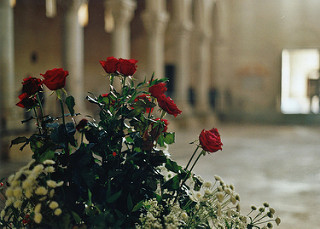

In [36]:
PIL.Image.open(roses[-1])

### Read flowers images from disk into numpy array using opencv

In [37]:
flowers_image_dict  = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [38]:
flowers_label_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [39]:
img = cv2.imread(str(flowers_image_dict['roses'][1]))
img.shape

(240, 320, 3)

In [40]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [42]:
from tqdm import tqdm
X, y = [], []
for flower_name, images in tqdm(flowers_image_dict.items()):
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_label_dict[flower_name])

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:39<00:00,  7.85s/it]


In [43]:
X = np.array(X)
y = np.array(y)

### Train test split

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=101)

### Preprocessing: scale images

In [45]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [46]:
X_train_scaled.shape

(2752, 180, 180, 3)

### Build convolutional neural network and train it

In [64]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu',input_shape = (180,180,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    #layers.Dense(5,activation='softmax')
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 22, 22, 64)      

In [67]:
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 47s 544ms/step - loss: 1.1148 - accuracy: 0.5531
Epoch 2/5
86/86 [==============================] - 48s 559ms/step - loss: 0.8981 - accuracy: 0.6414
Epoch 3/5
86/86 [==============================] - 47s 549ms/step - loss: 0.7077 - accuracy: 0.7311
Epoch 4/5
86/86 [==============================] - 48s 561ms/step - loss: 0.4807 - accuracy: 0.8332
Epoch 5/5
86/86 [==============================] - 52s 604ms/step - loss: 0.2853 - accuracy: 0.8997


In [68]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 5s 137ms/step - loss: 1.2020 - accuracy: 0.6471


[1.202018141746521, 0.6470588445663452]

##### Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [52]:
predictions = model.predict(X_test_scaled)
predictions

array([[ 2.485361  , -1.4017788 , -3.0519173 , -0.68960124,  3.0323272 ],
       [ 1.7851616 ,  2.8234336 ,  1.4186693 , -4.26717   , -0.63200474],
       [ 1.4189781 , -2.4509916 , -3.100923  ,  1.4067132 ,  3.847189  ],
       ...,
       [-2.1094694 ,  0.70799565,  2.9105759 ,  2.332891  ,  0.03919604],
       [-1.640272  , -1.630467  ,  1.4023738 ,  4.037395  ,  1.8662256 ],
       [ 1.8292586 , -1.6904774 , -1.5030751 ,  0.25809228,  1.8514525 ]],
      dtype=float32)

In [53]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.35787916, 0.00733792, 0.00140905, 0.0149578 , 0.6184161 ],
      dtype=float32)>

In [54]:
np.argmax(score)

4

In [55]:
y_test[0]

4

### Improve Test Accuracy Using Data Augmentation

In [56]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',
                                                input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

### Original Image

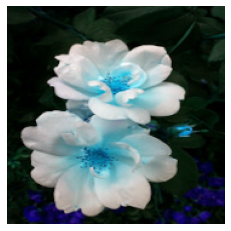

In [101]:
plt.axis('off')
plt.imshow(X[0])

### Newly generated training sample using data augmentation

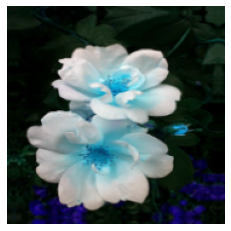

In [105]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

### Train the model using data augmentation and a drop out layer

In [61]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    #layers.Dense(5,activation='softmax')
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)       

In [62]:
model.fit(X_train_scaled,y_train,epochs=10 )

Epoch 1/10
86/86 [==============================] - 57s 632ms/step - loss: 1.4280 - accuracy: 0.3783
Epoch 2/10
86/86 [==============================] - 47s 551ms/step - loss: 1.0580 - accuracy: 0.5745
Epoch 3/10
86/86 [==============================] - 48s 563ms/step - loss: 0.9523 - accuracy: 0.6254
Epoch 4/10
86/86 [==============================] - 53s 615ms/step - loss: 0.8794 - accuracy: 0.6657
Epoch 5/10
86/86 [==============================] - 53s 620ms/step - loss: 0.8576 - accuracy: 0.6730
Epoch 6/10
86/86 [==============================] - 56s 655ms/step - loss: 0.8037 - accuracy: 0.6857
Epoch 7/10
86/86 [==============================] - 55s 640ms/step - loss: 0.7596 - accuracy: 0.7162
Epoch 8/10
86/86 [==============================] - 54s 628ms/step - loss: 0.7210 - accuracy: 0.7253
Epoch 9/10
86/86 [==============================] - 54s 624ms/step - loss: 0.7029 - accuracy: 0.7376
Epoch 10/10
86/86 [==============================] - 49s 575ms/step - loss: 0.6819 - accura

In [63]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 114ms/step - loss: 0.9106 - accuracy: 0.6601


[0.9106026291847229, 0.6601307392120361]

##### You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%